# 有监督学习
## 决策树模型
决策树是一种线性分类器模型，如果将变量的属性张成一张N维的坐标系，那么每一个分类结点都是一张超平面
### ID3分类树模型
ID3分类树使用了信息熵增益的方法作为所谓的损失函数，当选取一个属性值对当前数据集进行分类时，能够使得该数据集在分类后的总体信息熵减少最多，则选用该属性进行分类
#### 变量说明
1. 总体数据集 $X = \{X_1,X_2,...,X_n\}$ n为数据的数量
2. 属性集合   $A = \{a_1,a_2,...,a_d\}$ d为属性的数量
3. 标签集合   $Y = \{y_1,y_2,...,y_k\}$ k为标签的数量
4. 属性$a$的不同取值 ${a^1,a^2...,a^V}$
5. 满足属性$a$的其中取值$a^V$的数据集合 $X^V$

#### 公式说明
1. 数据集合的信息熵
$$
Ent(X) = - {\sum}^{|y|}_{k=1}p_k log_2 p_k
$$
其中$p_k$是数据集合中符合标签$k$的概率
2. 在选用属性a后数据集合的样本增益
$$
Gain(X,a) = Ent(X) - {\sum}_{v=1}^{|V|}\frac{|X^V|}{|X|}Ent(X^V)
$$

#### 递归流程说明
1. 递归结束条件
- 当前节点全部属于同一类别，递归结束
- 当前属性集为空，递归结束
- 当前所有样本在所有属性上取值相同，无法划分
- 当前节点包含的样本集合为空
2. 递归过程
- 从根节点出发，不断选取属性进行信息熵增益计算
- 选取信息熵增益最大的属性作为结点进行分类，递归
- 剪枝分为预剪枝和后剪枝，预剪枝可能会产生欠拟合，后剪枝由于需要事先生成整棵树会对性能造成极大压力

In [24]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib
import graphviz

使用 $DesicionTreeClassifier()$ 方法即可以使用决策树对模型进行拟合

In [13]:
iris = load_iris()
x,y = iris.data,iris.target
print("data num is %d, label num is %d" 
      % (len(x),len(y)))
print("structure of x: ", x.shape, x[0,:])
print("structure of y: ", y.shape, y[0])

data num is 150, label num is 150
structure of x:  (150, 4) [5.1 3.5 1.4 0.2]
structure of y:  (150,) 0


In [22]:
x_train,x_test,y_train,y_test = \
    train_test_split(x,y,test_size=0.2,shuffle=True)
print("X train size: {}, Y train size: {}"
      .format(len(x_train), len(y_train)))
print("X test size: {}, Y test size: {}"
      .format(len(x_test), len(y_test)))

X train size: 120, Y train size: 120
X test size: 30, Y test size: 30


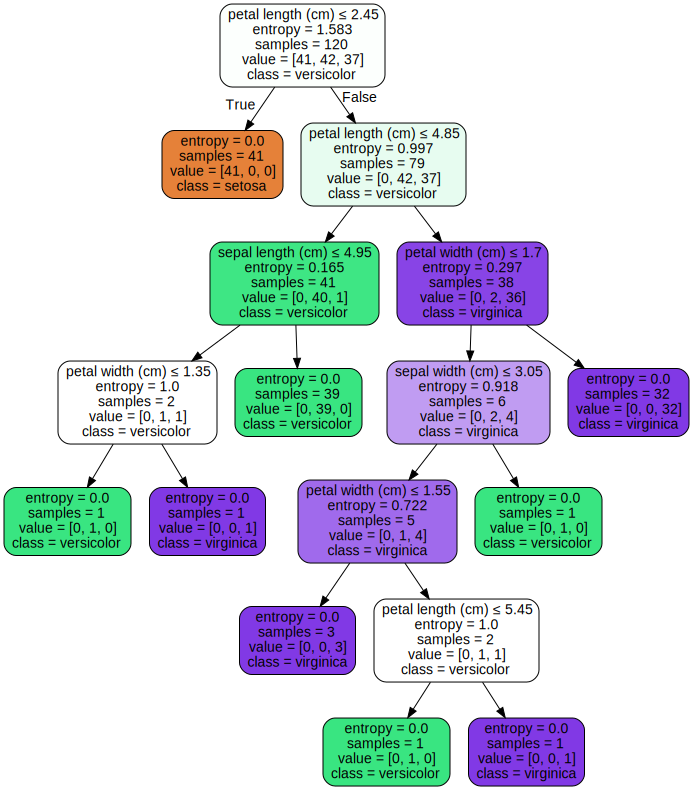

In [28]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train,y_train)
dot_data = tree.export_graphviz(clf,out_file=None,
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graphviz.Source(dot_data)

[Text(148.8, 201.90857142857143, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 120\nvalue = [41, 42, 37]'),
 Text(111.60000000000001, 170.84571428571428, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(186.0, 170.84571428571428, 'X[2] <= 4.85\nentropy = 0.997\nsamples = 79\nvalue = [0, 42, 37]'),
 Text(111.60000000000001, 139.78285714285715, 'X[0] <= 4.95\nentropy = 0.165\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(74.4, 108.72, 'X[2] <= 3.9\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(37.2, 77.65714285714284, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(111.60000000000001, 77.65714285714284, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(148.8, 108.72, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(260.40000000000003, 139.78285714285715, 'X[3] <= 1.7\nentropy = 0.297\nsamples = 38\nvalue = [0, 2, 36]'),
 Text(223.20000000000002, 108.72, 'X[2] <= 4.95\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(186.0, 77.65714285714284, 'entr

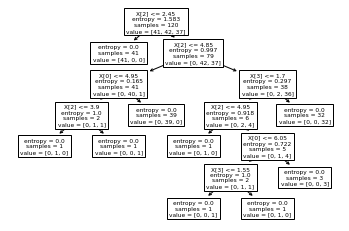

In [27]:
tree.plot_tree(clf)